<a href="https://colab.research.google.com/github/kaiovalente/backtest-analyzer/blob/master/backtest_analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### O objetivo deste estudo é analisar trades reais feitos pelo meu robô para operar Mini índice na bolsa brasileira B3

Este robô opera com uma estratégia scalper no mercado futuro realizando em média 20 operações por dia.




#### Importando Bibliotecas e CSV com dados dos trades realizados durante o mês de Janeiro



In [92]:
#import de bibliotecas necessarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
import numpy as np

%matplotlib inline

#leitura do csv carregado via upload com encondig específico e ;
df = pd.read_csv('https://raw.githubusercontent.com/kaiovalente/backtest-analyzer/master/backtest_janeiro.csv', encoding = "ISO-8859-1", sep=';')
df


,Ativo,Dia,Abertura,Fechamento,Tempo Operação,Qtd,Lado,Preço Compra,Preço Venda,Resultado Financeiro,Resultado Pontos,Total Acumulado,Acumlado Dia
0,WING20,02/01/2020,02/01/2020 09:35,02/01/2020 09:59,23min47s,1,C,"117.095,00","116.990,00",-21,-105,-21,-105
1,WING20,02/01/2020,02/01/2020 10:07,02/01/2020 10:12,4min57s,1,C,"117.070,00","117.075,00",1,5,-20,-100
2,WING20,02/01/2020,02/01/2020 10:17,02/01/2020 10:22,5min27s,1,C,"116.990,00","117.050,00",12,60,-8,-40
3,WING20,02/01/2020,02/01/2020 10:27,02/01/2020 10:30,2min53s,1,C,"116.995,00","117.085,00",18,90,10,50
4,WING20,02/01/2020,02/01/2020 11:10,02/01/2020 11:11,25s,1,C,"117.530,00","117.580,00",10,50,20,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,WING20,31/01/2020,31/01/2020 13:11,31/01/2020 13:11,30s,1,V,"113.605,00","113.695,00",18,90,67,525
403,WING20,31/01/2020,31/01/2020 13:19,31/01/2020 13:23,4min36s,1,V,"113.545,00","113.630,00",17,85,84,610
404,WING20,31/01/2020,31/01/2020 13:40,31/01/2020 14:13,33min49s,1,V,"113.730,00","113.470,00",-52,-260,32,350
405,WING20,31/01/2020,31/01/2020 14:35,31/01/2020 14:44,9min43s,1,C,"113.850,00","113.730,00",-24,-120,8,230


No total temos 407 trades no ativo WING20 de 02/01/2020 até 31/01/2020

### Entendo os dados
**Ativo:** Código do ativo operado

**Dia:** Dia da operação

**Abertura:** Dia e hora de abertura operação

**Fechamento:** Dia e hora de fechamento da operação

**Tempo Operação:** Duração da operação

**Qtd:** Quantidade de contratos operados na operação

**Lado:** 'C' para operação de compra 'V' para operação de venda

**Preço Compra:** Preço de compra da operação

**Preço Venda:** Preço de venda da operação

**Resultado Financeiro:** Resultado em R$ da operação

**Resultado Pontos:** Resultado em pontos da operação

**Total Acumulado:** Resultado financeiro acumulado de todas as operações passadas até agora

**Acumulado Dia:** Resultado em pontos acumulados de todas as operações deste dia


### Visualização e distribuição dos dados numéricos


In [0]:
#Total de linhas e colunas do arquivo
print("Total de linhas: {}".format(df.shape[0]))
print("Colunas: {}".format(df.shape[1]))

Total de linhas: 407
Colunas: 13


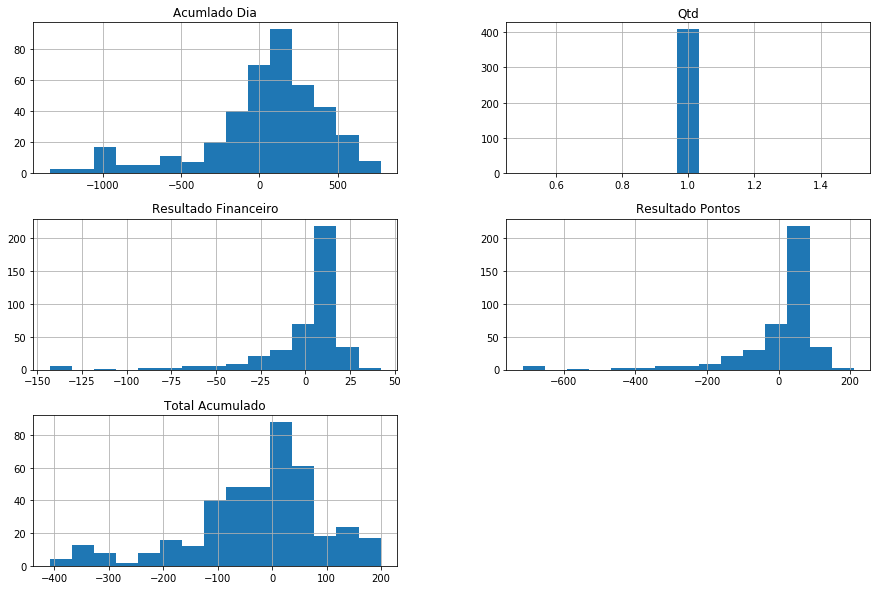

In [0]:
# Histograma de todas as variáveis
df.hist(bins=15, figsize=(15,10));

Neste gráfico podemos a curva de capital gerada pela execução estratégia durante todo o mês de janeiro. 

Nota-se que o resultado final ficou bem próximo de 0 com apenas **R$ 12** positivos


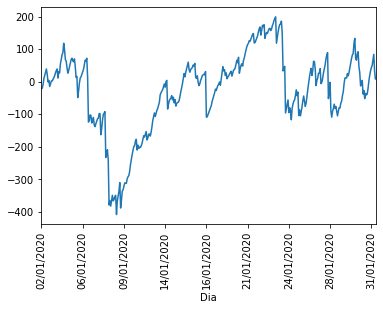

In [115]:
#Curva de capital da estratégia
df.set_index('Dia')['Total Acumulado'].plot();
plt.xticks(rotation=90);

In [0]:
df['Resultado Pontos'].describe()

count    407.000000
mean       0.147420
std      129.896142
min     -715.000000
25%       -7.500000
50%       35.000000
75%       65.000000
max      210.000000
Name: Resultado Pontos, dtype: float64

**Maximo Loss:** 715 pontos

**Maximo Gain:** 210 pontos

**Mediana:** 35 pontos




### Visualização de todos os trades em um gráfico de pontos e barra

Nota-se **7** operações perdedoras com mais de 500 pontos

Tivemos um total de **22** dias de operação, destes **15** tiveram saldo positivo e **7** com saldo negativo

In [113]:
#Stops Maiores que 500 pontos
df['Resultado Pontos'].lt(-500).sum()


7

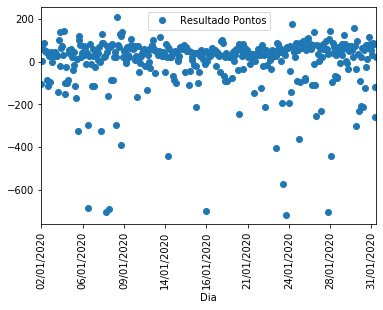

In [116]:
df.plot(x='Dia', y='Resultado Pontos', style='o');
plt.xticks(rotation=90);

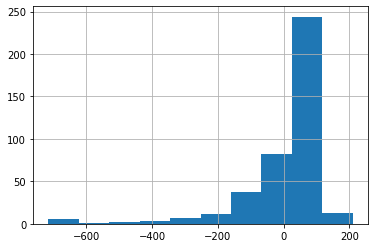

In [0]:
df['Resultado Pontos'].hist();

In [0]:
print("Dias positivos: {}".format(df_group['sum'].gt(0).sum()))
print("Dias negativos: {}".format(df_group['sum'].lt(0).sum()))

Dias positivos: 15
Dias negativos: 7


## Hipótese a ser validada: Se houver um limite de perda diária máxima de **200** pontos meu resultado mensal seria melhor ou pior?

Vamos Testar!

Começo criando um novo dataframe onde removo todos os dias onde houveram perdas iguais ou superiores a **200** pontos

In [74]:
df_remove = df[df['Acumlado Dia'].le(-200)]
dias = df_remove['Dia'].unique()

df_dias_positivos = df.copy()

remove_index = np.where(df_dias_positivos['Dia'].isin(dias))

df_dias_positivos = df_dias_positivos.drop(remove_index[0])
df_dias_positivos


,Ativo,Dia,Abertura,Fechamento,Tempo Operação,Qtd,Lado,Preço Compra,Preço Venda,Resultado Financeiro,Resultado Pontos,Total Acumulado,Acumlado Dia
0,WING20,02/01/2020,02/01/2020 09:35,02/01/2020 09:59,23min47s,1,C,"117.095,00","116.990,00",-21,-105,-21,-105
1,WING20,02/01/2020,02/01/2020 10:07,02/01/2020 10:12,4min57s,1,C,"117.070,00","117.075,00",1,5,-20,-100
2,WING20,02/01/2020,02/01/2020 10:17,02/01/2020 10:22,5min27s,1,C,"116.990,00","117.050,00",12,60,-8,-40
3,WING20,02/01/2020,02/01/2020 10:27,02/01/2020 10:30,2min53s,1,C,"116.995,00","117.085,00",18,90,10,50
4,WING20,02/01/2020,02/01/2020 11:10,02/01/2020 11:11,25s,1,C,"117.530,00","117.580,00",10,50,20,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,WING20,31/01/2020,31/01/2020 13:11,31/01/2020 13:11,30s,1,V,"113.605,00","113.695,00",18,90,67,525
403,WING20,31/01/2020,31/01/2020 13:19,31/01/2020 13:23,4min36s,1,V,"113.545,00","113.630,00",17,85,84,610
404,WING20,31/01/2020,31/01/2020 13:40,31/01/2020 14:13,33min49s,1,V,"113.730,00","113.470,00",-52,-260,32,350
405,WING20,31/01/2020,31/01/2020 14:35,31/01/2020 14:44,9min43s,1,C,"113.850,00","113.730,00",-24,-120,8,230


### Neste dataframe agrupo os dias em que tive perda superior a 200 pontos e qual a quantidade de pontos exata após a superação do limite de perda diária

O tota de perdas no mês foi **-2835** pontos

In [36]:
#Total de Loss
df_dias_negativos = df_remove.groupby('Dia').first()
df_negativos = pd.DataFrame(df_dias_negativos['Acumlado Dia'])
df_negativos

,Acumlado Dia
Dia,
06/01/2020,-275
07/01/2020,-295
08/01/2020,-350
09/01/2020,-295
14/01/2020,-300
16/01/2020,-200
23/01/2020,-270
24/01/2020,-240
28/01/2020,-395


In [23]:
df_remove.groupby('Dia').first()['Acumlado Dia'].sum()

-2835

### Aqui agrupo todos os dias positivos obtendo a soma de todos os trades por dia e o total de operações naquele dia

Tivemos um total de **4775** pontos entre os dias positivos



In [27]:
df_dias_positivos.groupby('Dia')['Resultado Pontos'].agg(['sum', 'count'])

,sum,count
Dia,,
02/01/2020,55,21
03/01/2020,285,16
10/01/2020,225,18
13/01/2020,775,19
15/01/2020,565,18
17/01/2020,510,15
20/01/2020,250,20
21/01/2020,385,24
22/01/2020,260,21


In [26]:
df_dias_positivos.groupby('Dia')['Resultado Pontos'].agg(['sum', 'count'])['sum'].sum()

4775

### Finalmente neste dataframe agrupo e ordeno dias positivos e dias negativos

In [70]:
df_dias_positivos_group = df_dias_positivos.groupby('Dia')['Resultado Pontos'].agg(['sum'])
df_negativos = df_negativos.rename(columns={"Acumlado Dia": "sum"})

df_geral = pd.concat([df_dias_positivos_group, df_negativos])
df_geral = df_geral.sort_values(by=['Dia'])
df_geral


,sum
Dia,
02/01/2020,55
03/01/2020,285
06/01/2020,-275
07/01/2020,-295
08/01/2020,-350
09/01/2020,-295
10/01/2020,225
13/01/2020,775
14/01/2020,-300


Crio uma nova coluna no dataframe com o resultado acumulado em pontos de todas as operações por dia

In [71]:
df_geral['acumulado'] = df_geral.cumsum()
df_geral

,sum,acumulado
Dia,,
02/01/2020,55,55
03/01/2020,285,340
06/01/2020,-275,65
07/01/2020,-295,-230
08/01/2020,-350,-580
09/01/2020,-295,-875
10/01/2020,225,-650
13/01/2020,775,125
14/01/2020,-300,-175


In [97]:
df_geral['Dia'] = df_geral.index
df_geral

,sum,acumulado,Dia
Dia,,,
02/01/2020,55,55,02/01/2020
03/01/2020,285,340,03/01/2020
06/01/2020,-275,65,06/01/2020
07/01/2020,-295,-230,07/01/2020
08/01/2020,-350,-580,08/01/2020
09/01/2020,-295,-875,09/01/2020
10/01/2020,225,-650,10/01/2020
13/01/2020,775,125,13/01/2020
14/01/2020,-300,-175,14/01/2020


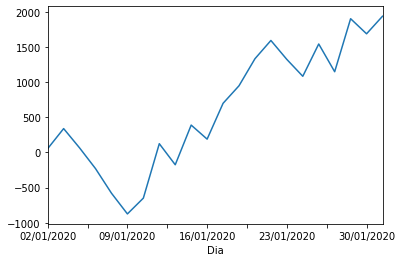

In [75]:
df_geral['acumulado'].plot();


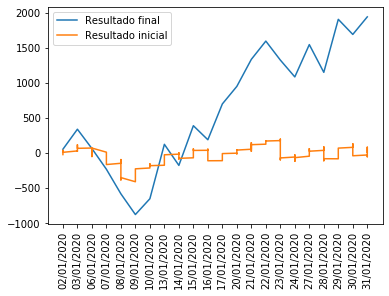

In [111]:
#Comparando resultado inicial com resultado final
plt.plot( 'Dia', 'acumulado', data=df_geral);
plt.plot( 'Dia', 'Total Acumulado', data=df);
plt.legend(['Resultado final', 'Resultado inicial'], loc='upper left')
plt.xticks(rotation=90);



## Finalmente obtemos o resultado final.

**Conclusão**: Sim, adicionando um limite máximo de perda de 200 pontos por dia o resultado final do robô melhora consideravelmente para **1940** pontos no mês de janeiro

Interessante notar que na execução inicial tivemos 15 dias positivos e 7 dias negativos com um total de **R$ 12**

Após a análise e inclusão do limite de perda diário, passamos para 13 dias positivos e 9 negativos. Porém o resultado financeiro final seria de **R$ 388** (para 1 mini contrato)
